In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

df_master = pd.read_csv('skewed_data.csv')
df_master.head()

X = np.array(df_master[['0','1']])
Y = df_master[['target']]

print("X Shape: " + str(X.shape),"Y Shape: " + str(Y.shape))


X Shape: (500, 2) Y Shape: (500, 1)


In [23]:
def class_contour(X,model):
    ''' function that returns arrays of the countour of the decision boundary of class 0 '''    
    xlim = (X[:,0].min()*2.50,X[:,0].max()*5)
    ylim = (X[:,1].min()*2.50,X[:,1].max()*5)

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200),
                        np.linspace(ylim[0], ylim[1], 200))
    if model == 'naive':
        clf = GaussianNB()
        clf.fit(X_train,np.array(Y_train))
        Z = clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])
        Z = Z[:,1].reshape(xx.shape)
    elif model == 'logistic':
        log = LogisticRegression(random_state=2,solver='lbfgs',multi_class='multinomial').fit(X, y)
        Z = clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])
        Z = Z[:,1].reshape(xx.shape)
    return xx,yy,Z

def find_wrong_pred(X_test, Y_test):
    '''function that returns the X matrix of mis-classified observations'''    
    Y_comp = np.matrix([Y_test,clf.predict(X_test)]).T
    wrong_array = []
    for entry in range(len(Y_test)):
        obs = np.ravel(Y_comp[entry])
        #print obs[0],obs[1]
        if obs[0] != obs[1]:
            #print 'Wrong!: %i'%entry
            wrong_array.append(entry)
        else:
            continue
    X_out = X_test[wrong_array,:]
    return X_out

In [10]:
'''clf = GaussianNB()
clf.fit(X_train,np.array(Y_train))

print 'Naive Bayes Accuracy: %s'%clf.score(X_test, Y_test)

log = LogisticRegression(random_state=2,solver='lbfgs',multi_class='multinomial').fit(X, y)

log.score(X_test,Y_test)
log.predict_proba(X_test)'''

"clf = GaussianNB()\nclf.fit(X_train,np.array(Y_train))\n\nprint 'Naive Bayes Accuracy: %s'%clf.score(X_test, Y_test)\n\nlog = LogisticRegression(random_state=2,solver='lbfgs',multi_class='multinomial').fit(X, y)\n\nlog.score(X_test,Y_test)\nlog.predict_proba(X_test)"

In [11]:
'''fig = plt.figure(figsize=(16,6))
ax = plt.subplot(121)
plt.scatter(x=X_test.iloc[:,0],y=X_test.iloc[:,1],c=Y_test.iloc[:,0], label='Actual')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Actual')
plt.subplot(122)
plt.scatter(x=X_test.iloc[:,0],y=X_test.iloc[:,1], c=clf.predict(X_test))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Predicted')'''

"fig = plt.figure(figsize=(16,6))\nax = plt.subplot(121)\nplt.scatter(x=X_test.iloc[:,0],y=X_test.iloc[:,1],c=Y_test.iloc[:,0], label='Actual')\nplt.xlabel('X1')\nplt.ylabel('X2')\nplt.title('Actual')\nplt.subplot(122)\nplt.scatter(x=X_test.iloc[:,0],y=X_test.iloc[:,1], c=clf.predict(X_test))\nplt.xlabel('X1')\nplt.ylabel('X2')\nplt.title('Predicted')"

# Clustered


Class Separation: 0.000000
Naive Bayes Test Accuracy: 0.6133333333333333
Naive Bayes Score: 0.6133333333333333
Naive Params: {'priors': None, 'var_smoothing': 1e-09}
Log Score: 0.5466666666666666

Class Separation: 0.555556
Naive Bayes Test Accuracy: 0.6933333333333334
Naive Bayes Score: 0.6933333333333334
Naive Params: {'priors': None, 'var_smoothing': 1e-09}
Log Score: 0.7533333333333333

Class Separation: 1.111111
Naive Bayes Test Accuracy: 0.9333333333333333
Naive Bayes Score: 0.9333333333333333
Naive Params: {'priors': None, 'var_smoothing': 1e-09}
Log Score: 0.94

Class Separation: 1.666667
Naive Bayes Test Accuracy: 0.98
Naive Bayes Score: 0.98
Naive Params: {'priors': None, 'var_smoothing': 1e-09}
Log Score: 1.0

Class Separation: 2.222222
Naive Bayes Test Accuracy: 1.0
Naive Bayes Score: 1.0
Naive Params: {'priors': None, 'var_smoothing': 1e-09}
Log Score: 1.0

Class Separation: 2.777778
Naive Bayes Test Accuracy: 1.0
Naive Bayes Score: 1.0
Naive Params: {'priors': None, 'var

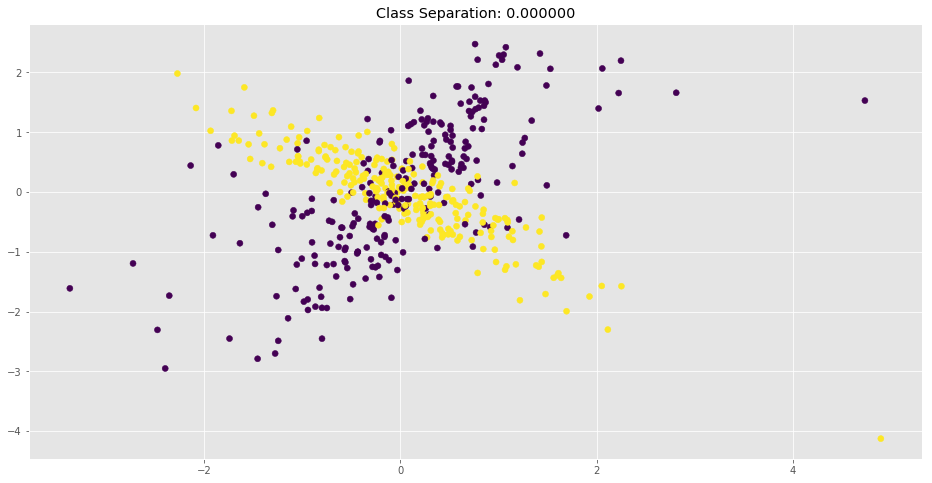

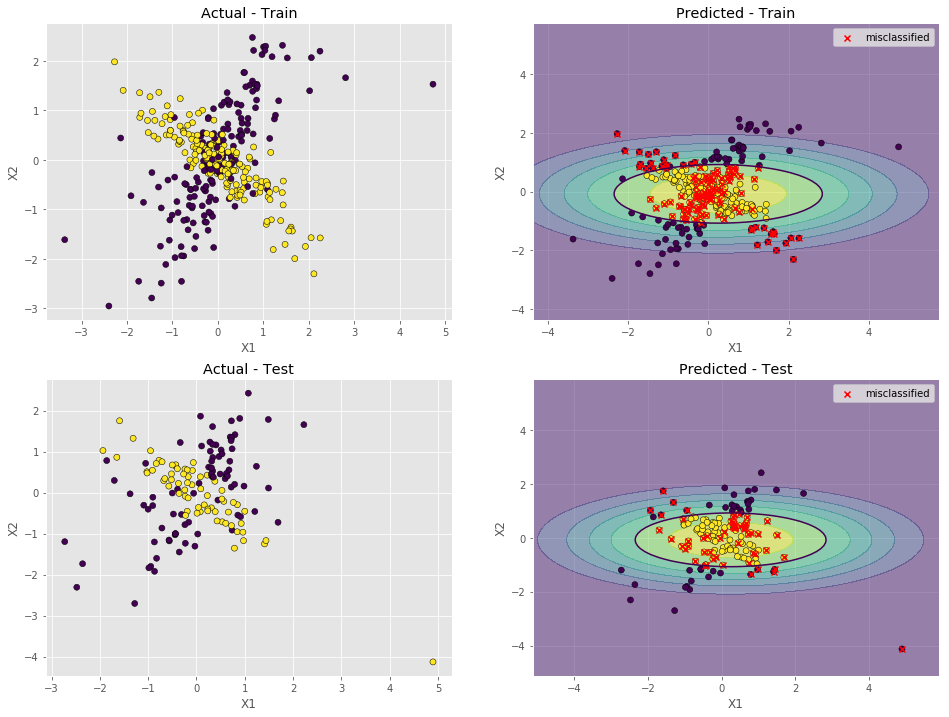

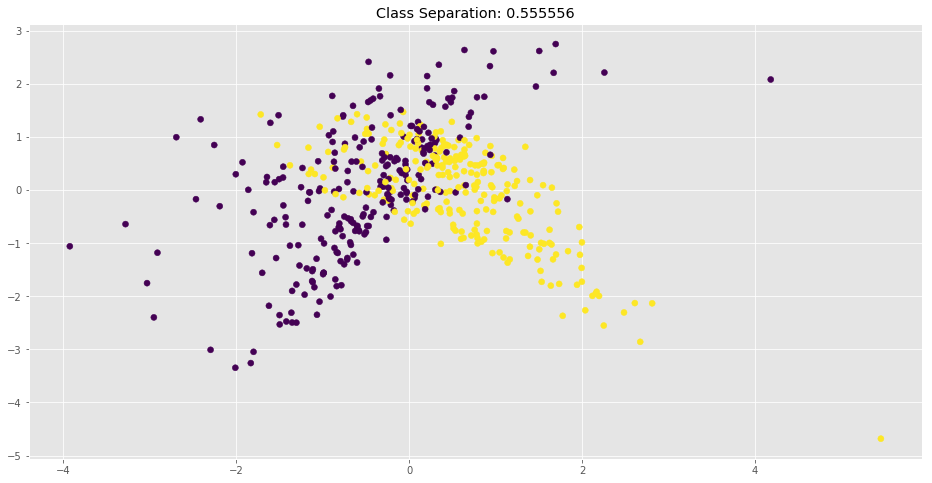

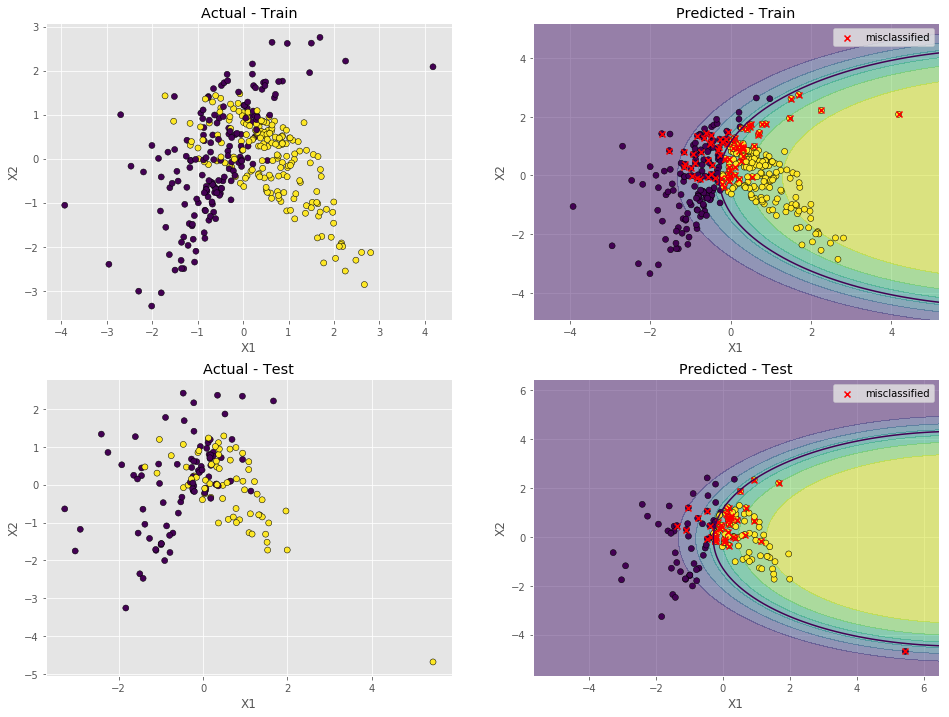

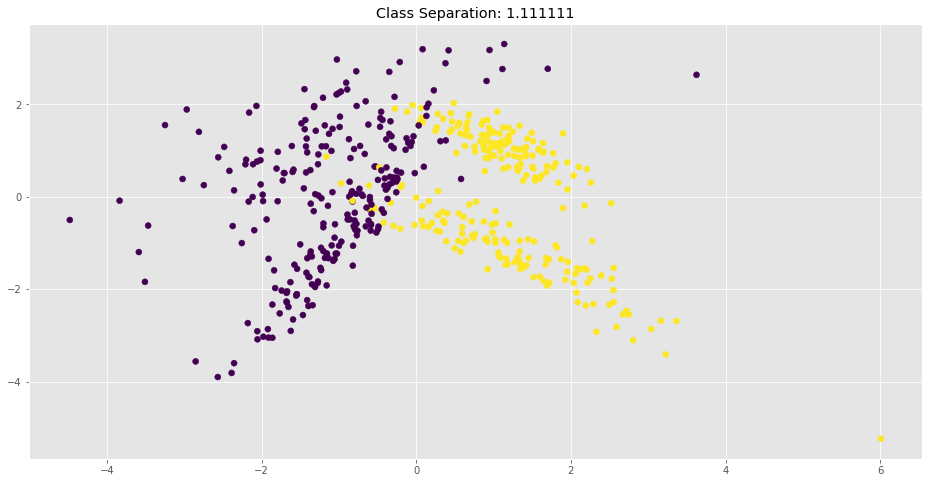

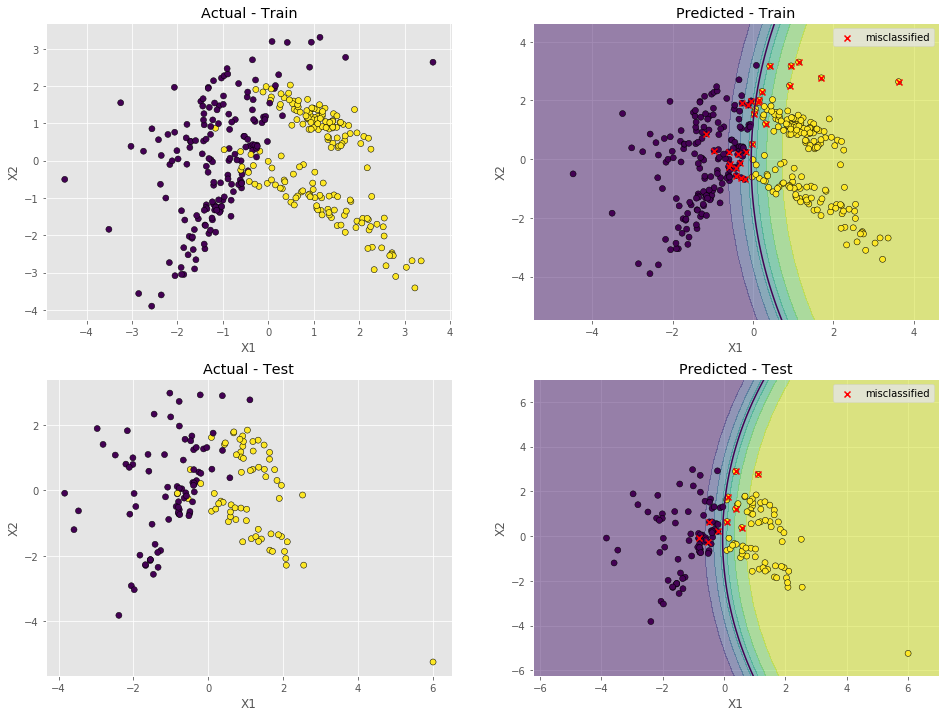

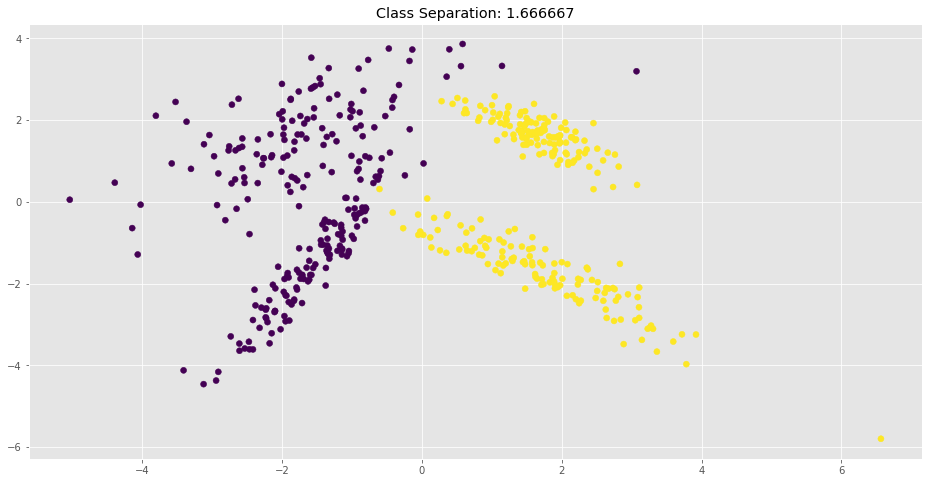

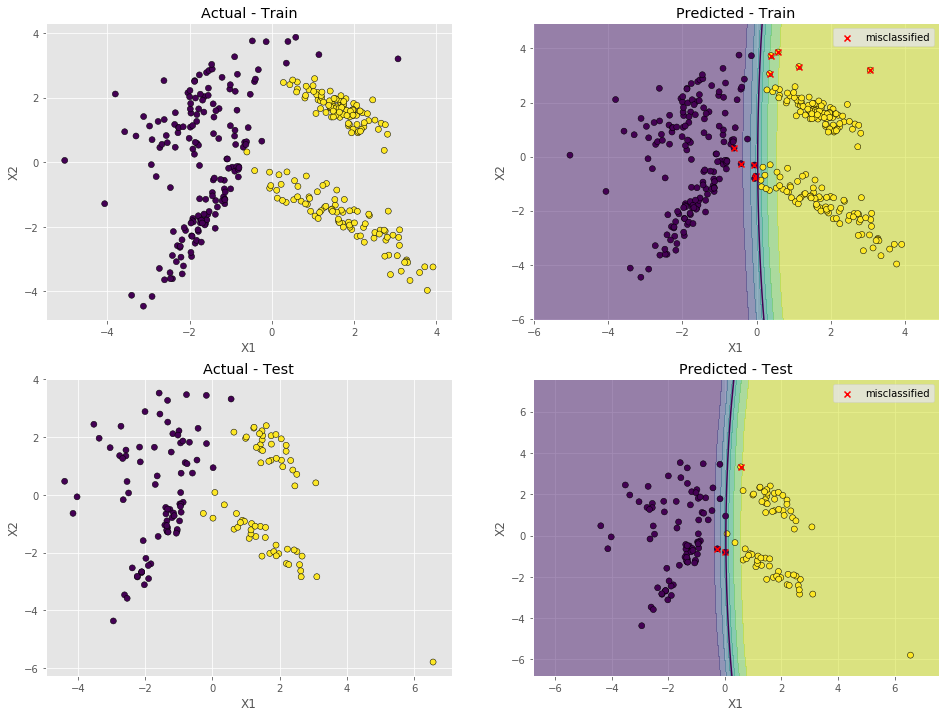

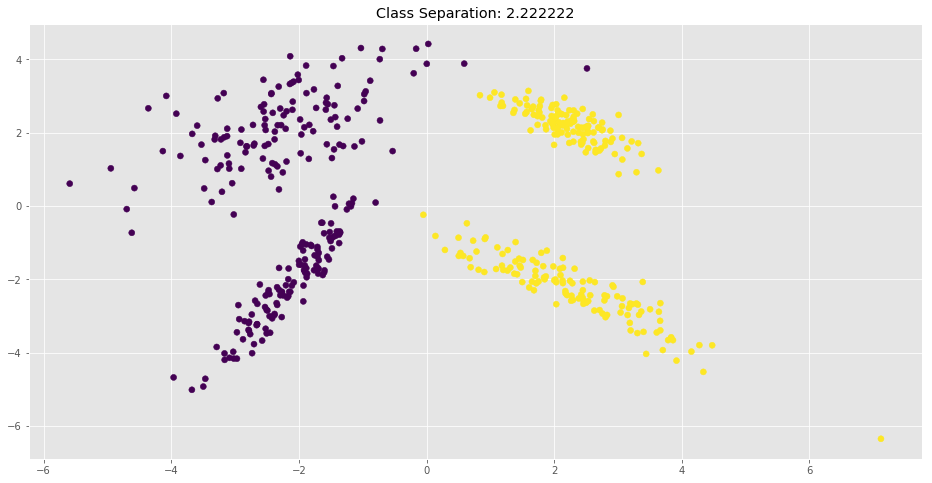

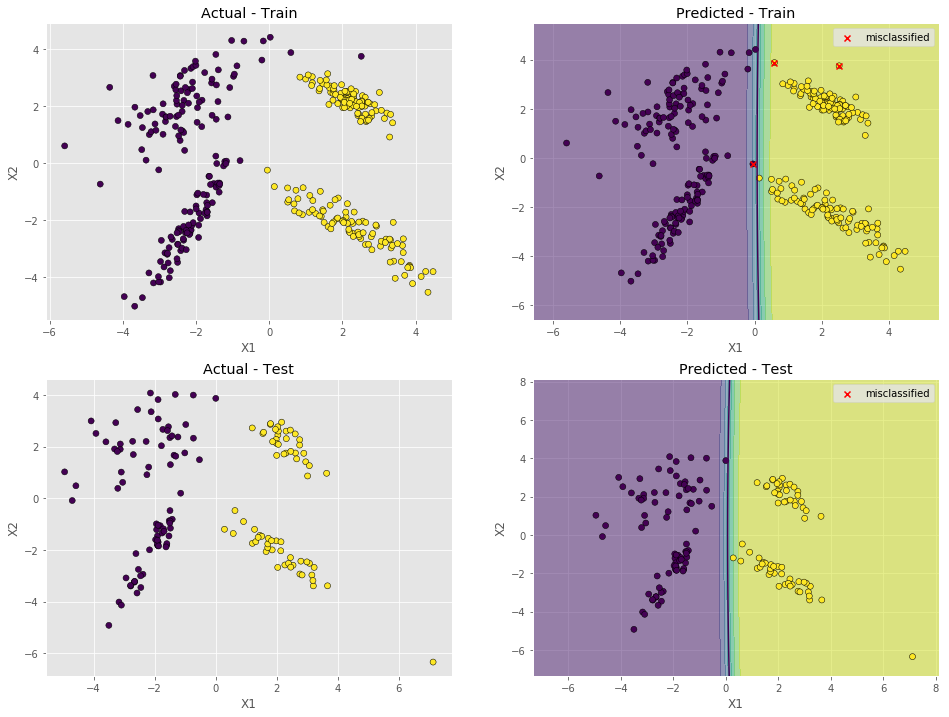

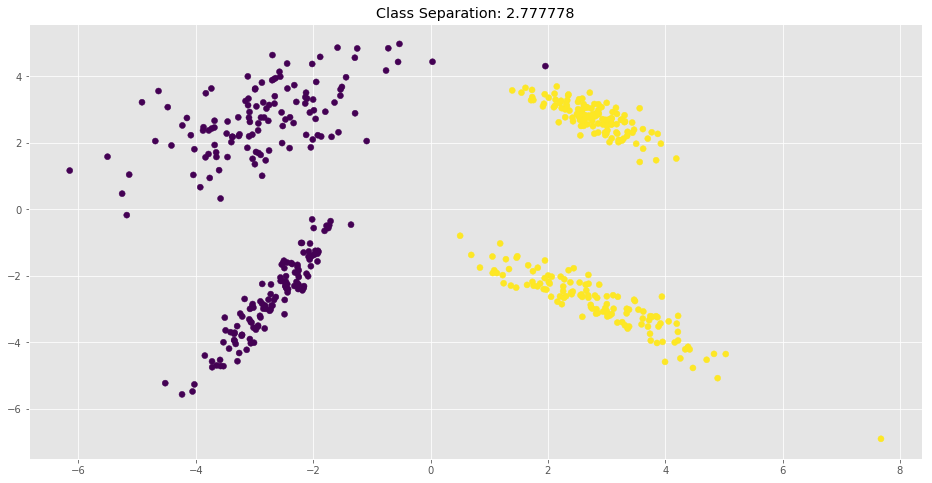

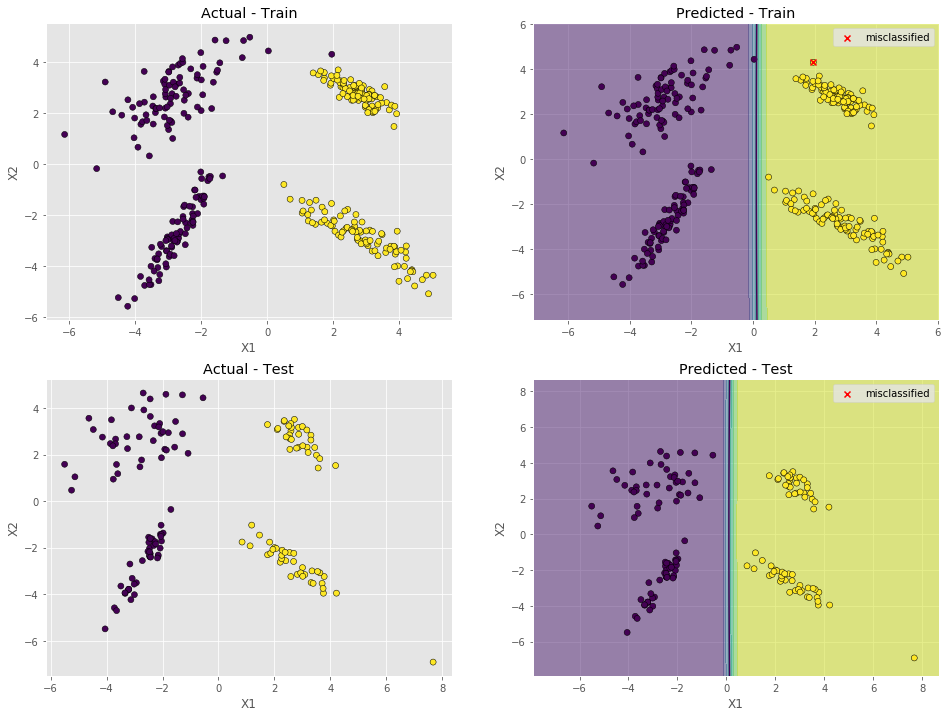

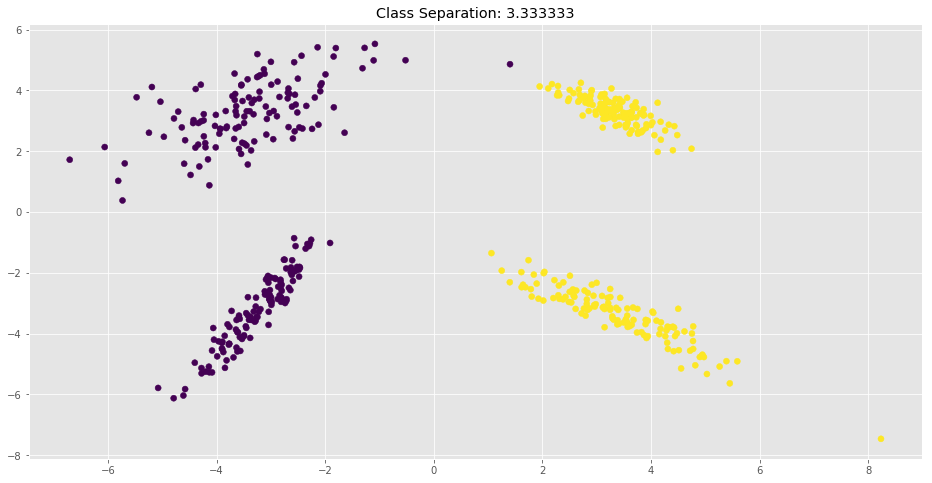

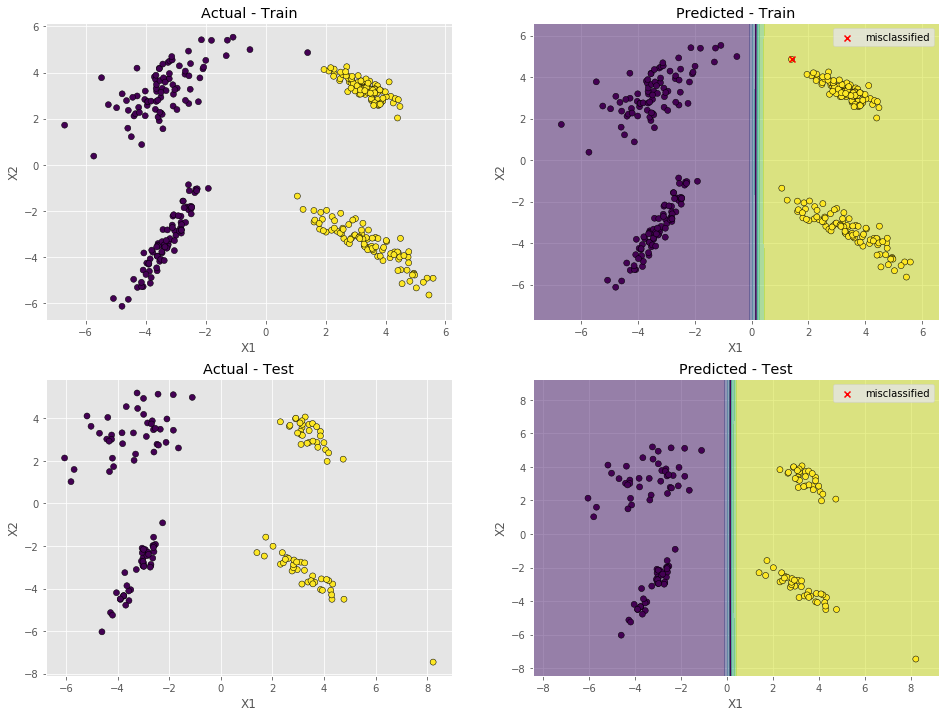

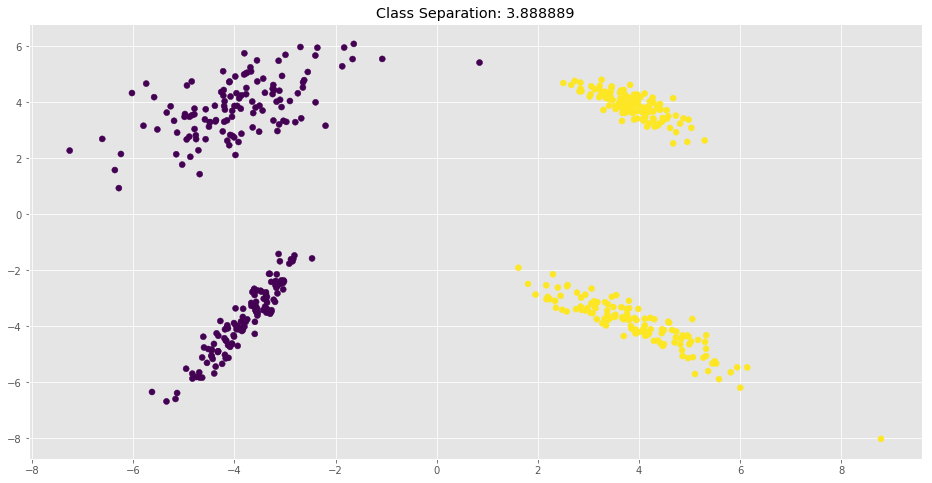

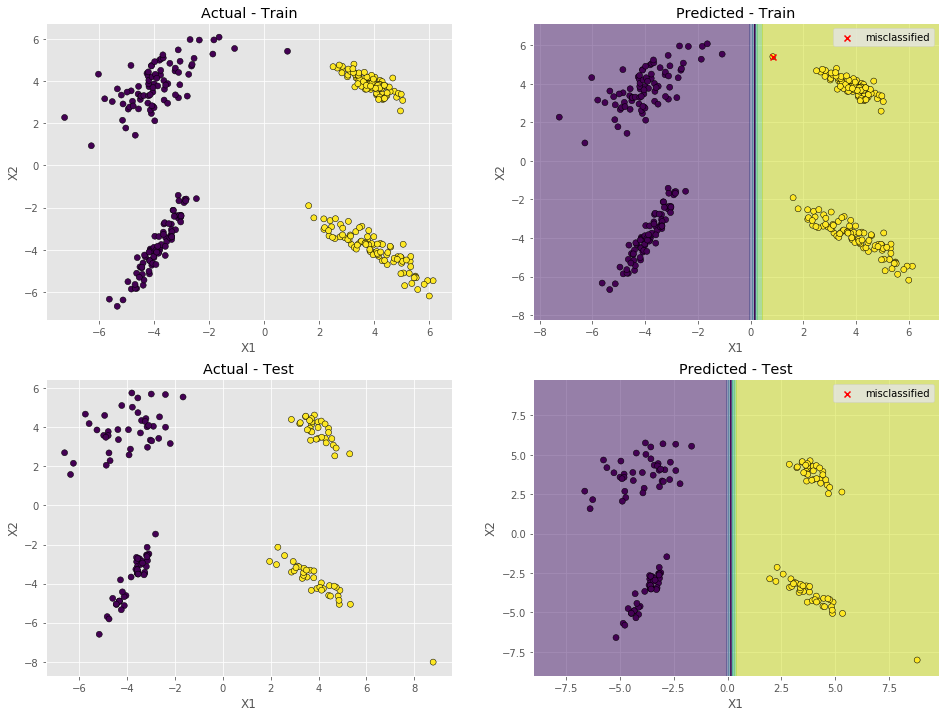

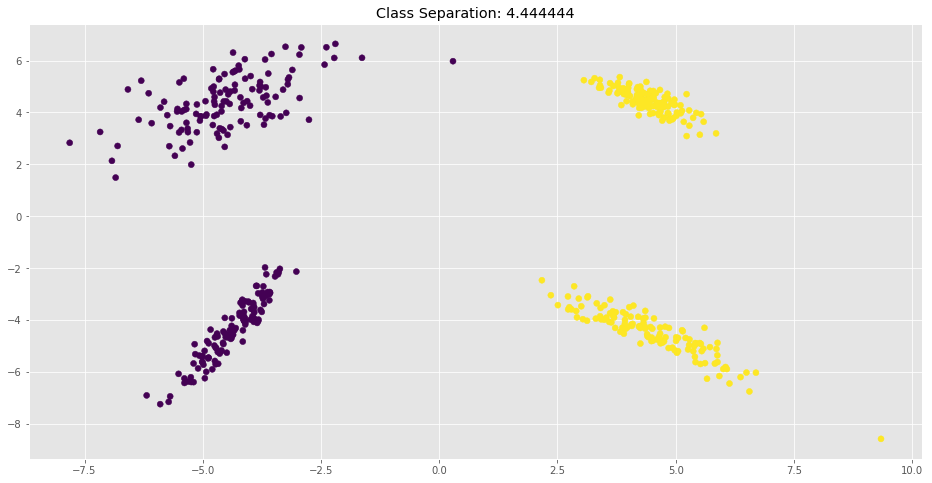

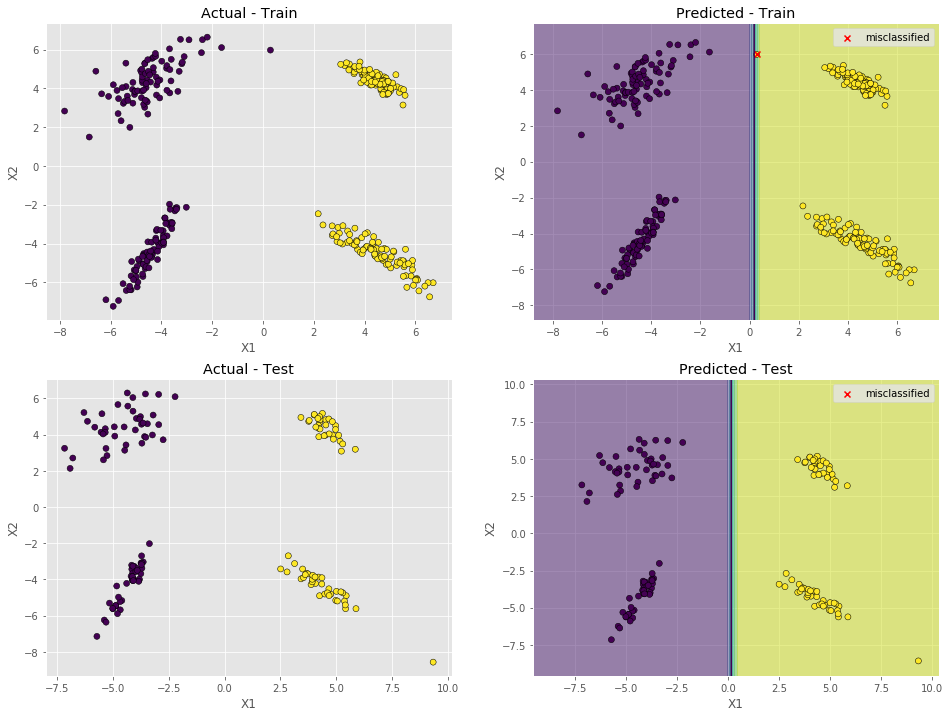

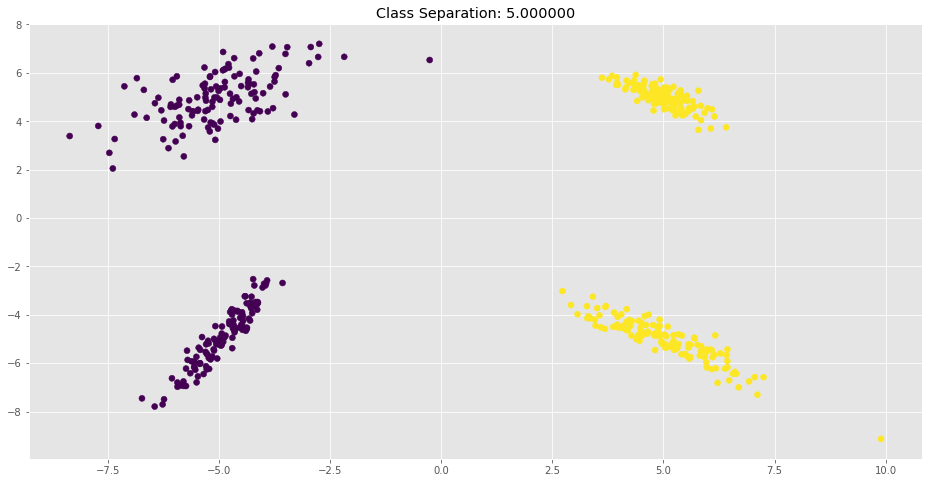

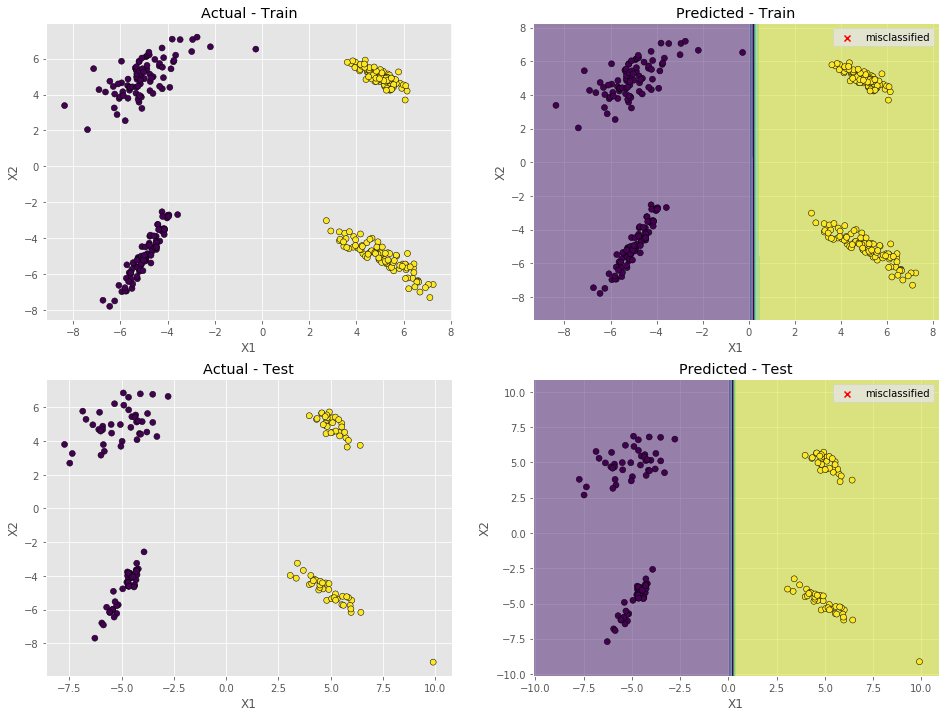

In [25]:
for i in np.linspace(0,5,10):
    np.random.seed(100)
    ''' clustered data '''
    X, y = sklearn.datasets.make_classification(n_samples=500,n_features = 2, n_informative = 2, 
                                                     n_redundant = 0,n_classes = 2,n_clusters_per_class = 2,
                                                         class_sep = i,flip_y=.0,)

    fig = plt.figure(figsize=(16,8))
    ax = plt.subplot(111)
    plt.title('Class Separation: %f'%i)
    plt.scatter(x=X[:,0],y=X[:,1],c=y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state= 40)

    '''print X_train.shape
    print Y_train.shape'''

    clf = GaussianNB()
    clf.fit(X_train,np.array(Y_train))
    log = LogisticRegression(random_state=2,solver='lbfgs',multi_class='multinomial').fit(X, y)

    print('\nClass Separation: %f'%i)
    print('Naive Bayes Test Accuracy: %s'%clf.score(X_test, Y_test))
    print('Naive Bayes Score: %s'%clf.score(X_test,Y_test))
    print('Naive Params: %s'%clf.get_params(deep=True))
    print('Log Score: %s'%log.score(X_test,Y_test))
    
    X_wrongTrain = find_wrong_pred(X_train,Y_train)
    X_wrongTest = find_wrong_pred(X_test,Y_test)
    
    xx,yy,z = class_contour(X_train,'naive')
    #lrxx, lryy, lrz = class_contour(X_train,'logistic')
    fig = plt.figure(figsize=(16,12))
    ax = plt.subplot(221)
    plt.scatter(x=X_train[:,0],y=X_train[:,1],c=Y_train, label='Actual',edgecolors='black')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Actual - Train')
    plt.subplot(222)
    plt.contourf(xx,yy,z,alpha=0.5)
    plt.scatter(x=X_train[:,0],y=X_train[:,1], c=clf.predict(X_train),edgecolors='black')
    plt.scatter(x=X_wrongTrain[:,0],y=X_wrongTrain[:,1],c='red', marker='x',label='misclassified')
    plt.contour(xx,yy,z,[.5])
    plt.xlim(X_train.min()-1,X_train.max()+1)
    plt.ylim(X_train.min()-1,X_train.max()+1)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Predicted - Train')
    plt.legend()

    xx,yy,z = class_contour(X_test,'naive')
    ax = plt.subplot(223)
    plt.scatter(x=X_test[:,0],y=X_test[:,1],c=Y_test, label='Actual',edgecolors='black')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Actual - Test')
    plt.subplot(224)
    plt.contourf(xx,yy,z,alpha=0.5)
    plt.scatter(x=X_test[:,0],y=X_test[:,1], c=clf.predict(X_test),edgecolors='black')
    plt.scatter(x=X_wrongTest[:,0],y=X_wrongTest[:,1],c='red', marker= 'x', label='misclassified')
    plt.contour(xx,yy,z,[.5],)
    plt.xlim(X_test.min()-1,X_test.max()+1)
    plt.ylim(X_test.min()-1,X_test.max()+1)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Predicted - Test')
    plt.legend()


Delta Mu: 3.000000
Naive Bayes Test Accuracy: 0.7466666666666667
Naive Bayes Score: 0.7466666666666667
Naive Params: {'priors': None, 'var_smoothing': 1e-09}

Delta Mu: 4.000000
Naive Bayes Test Accuracy: 0.8466666666666667
Naive Bayes Score: 0.8466666666666667
Naive Params: {'priors': None, 'var_smoothing': 1e-09}

Delta Mu: 5.000000
Naive Bayes Test Accuracy: 0.9
Naive Bayes Score: 0.9
Naive Params: {'priors': None, 'var_smoothing': 1e-09}

Delta Mu: 6.000000
Naive Bayes Test Accuracy: 0.92
Naive Bayes Score: 0.92
Naive Params: {'priors': None, 'var_smoothing': 1e-09}

Delta Mu: 7.000000
Naive Bayes Test Accuracy: 0.9333333333333333
Naive Bayes Score: 0.9333333333333333
Naive Params: {'priors': None, 'var_smoothing': 1e-09}


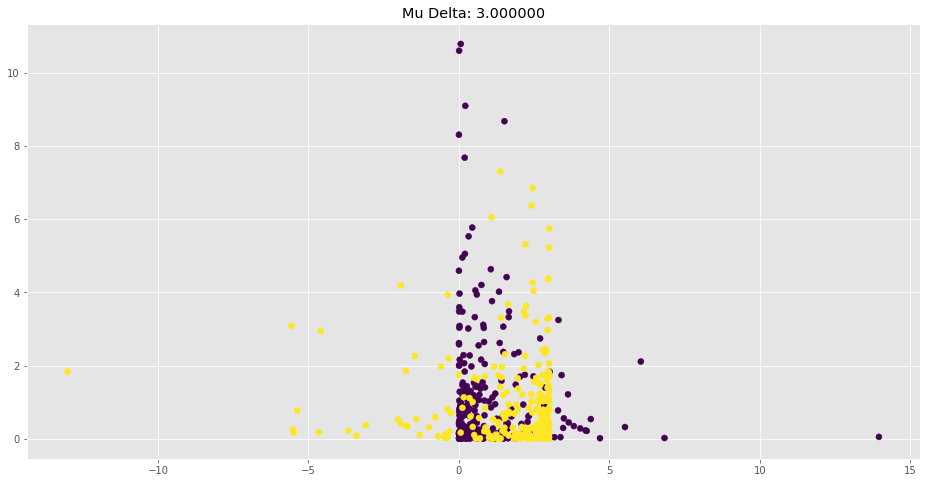

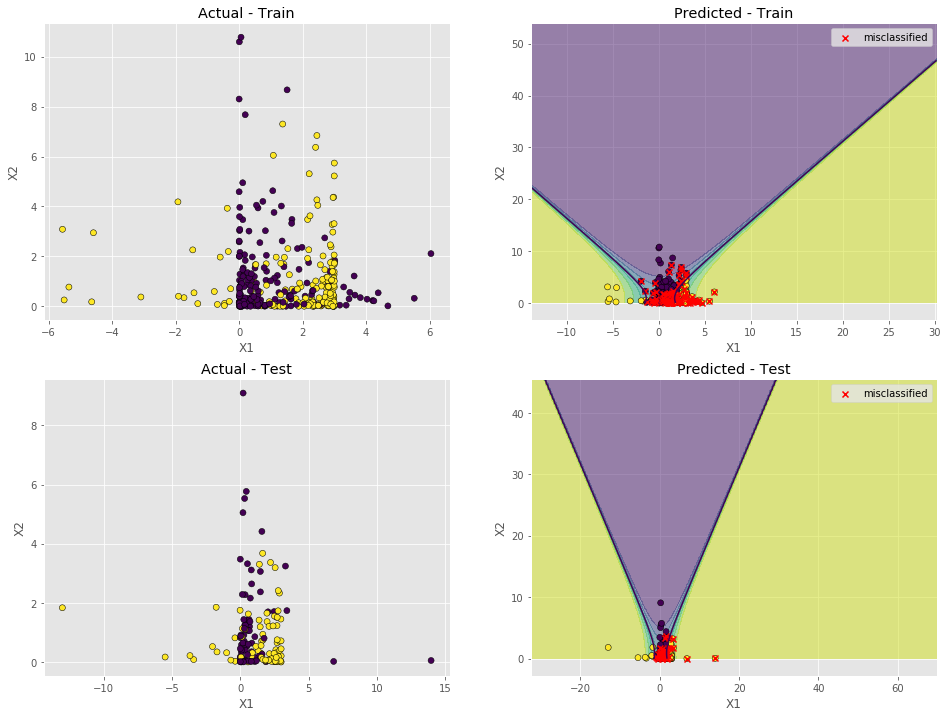

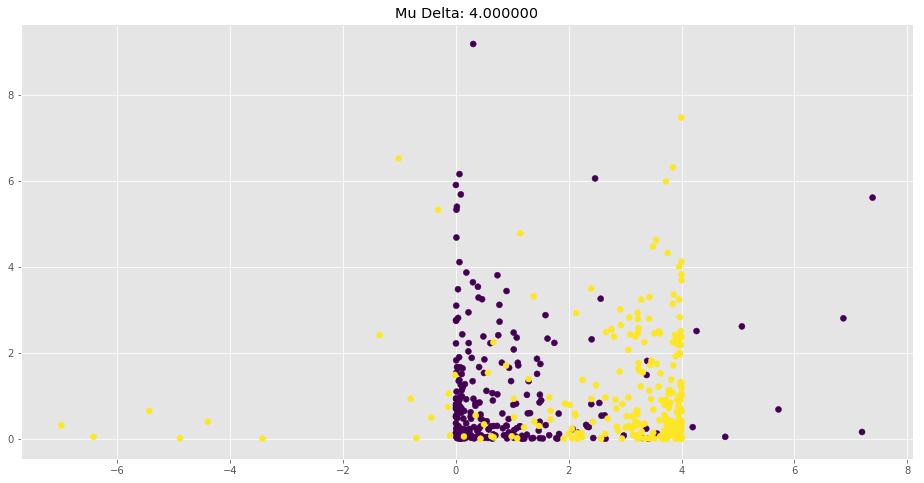

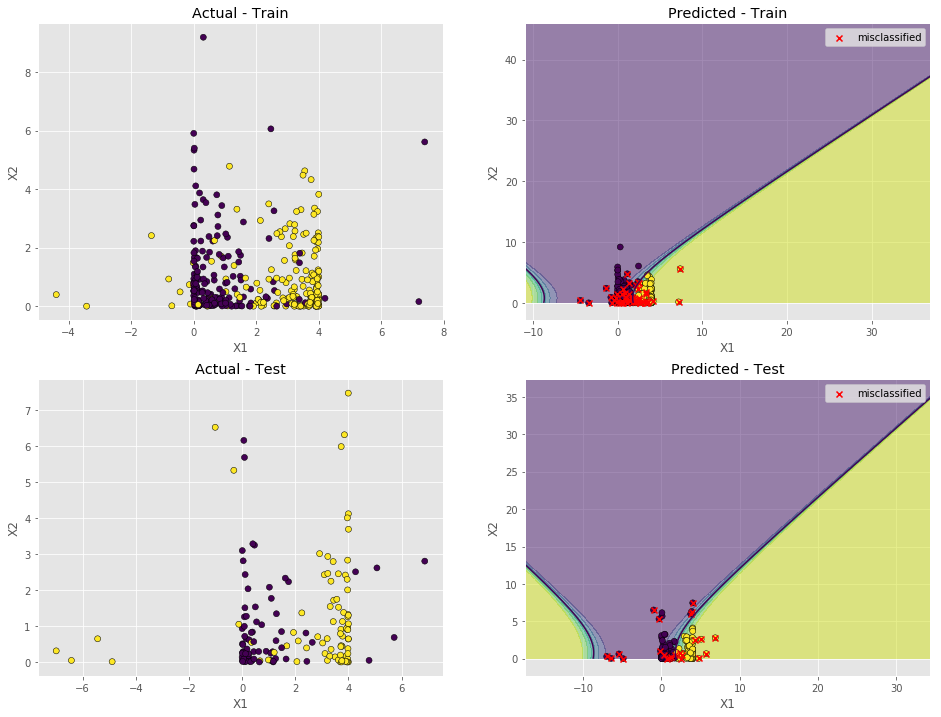

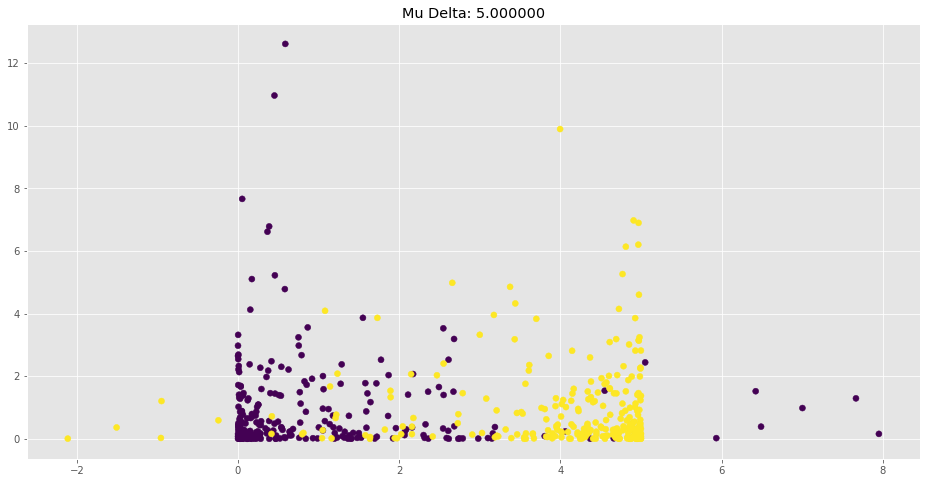

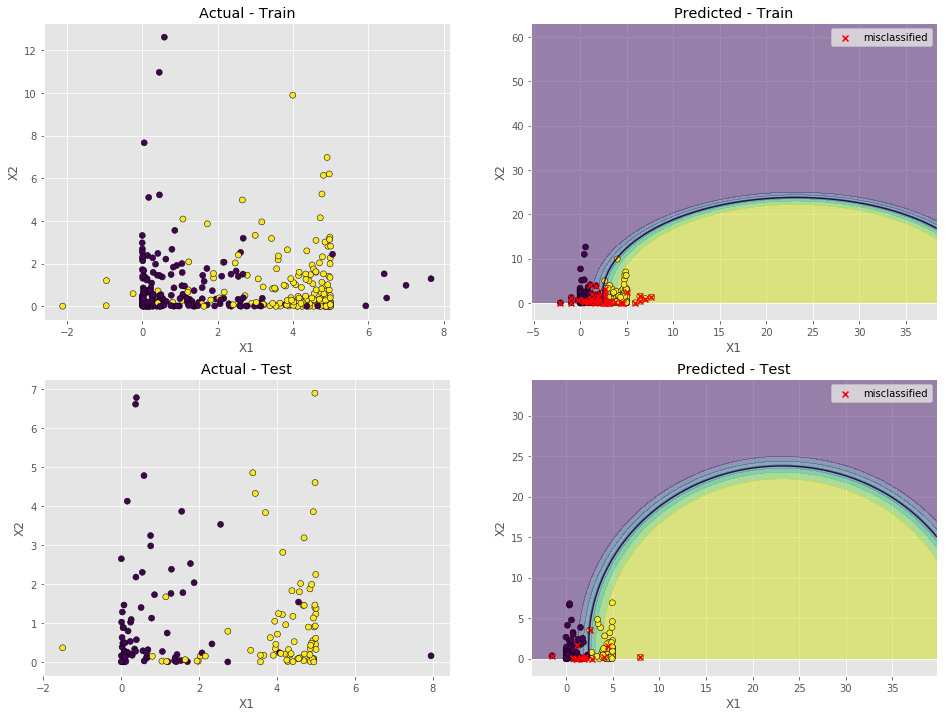

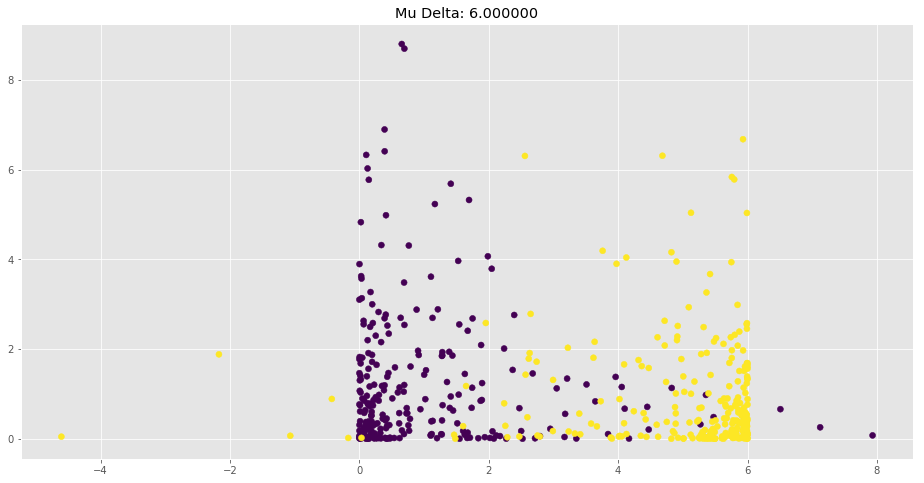

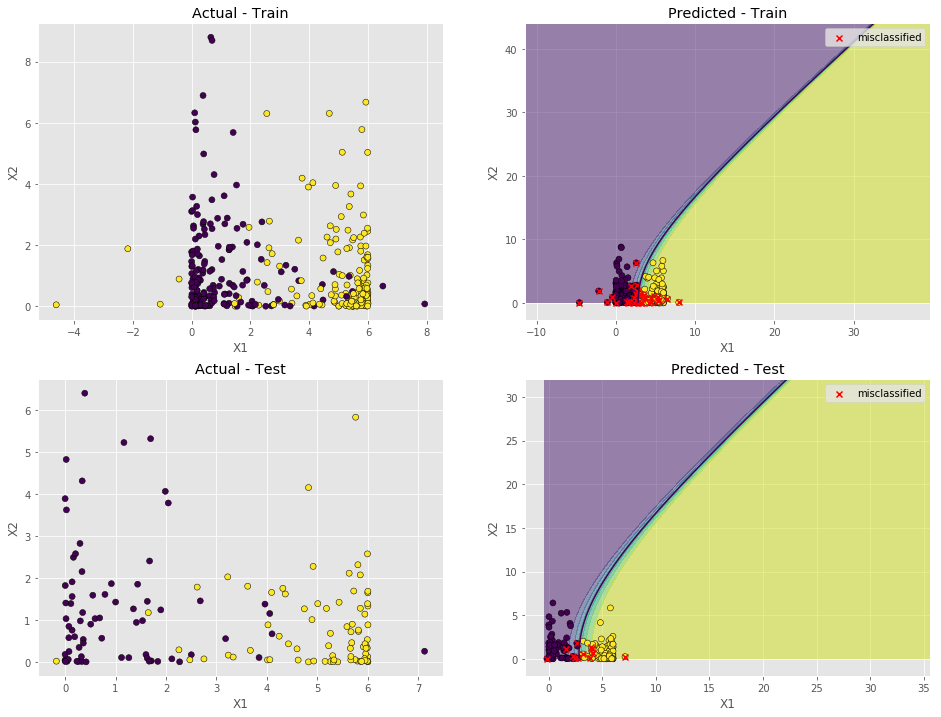

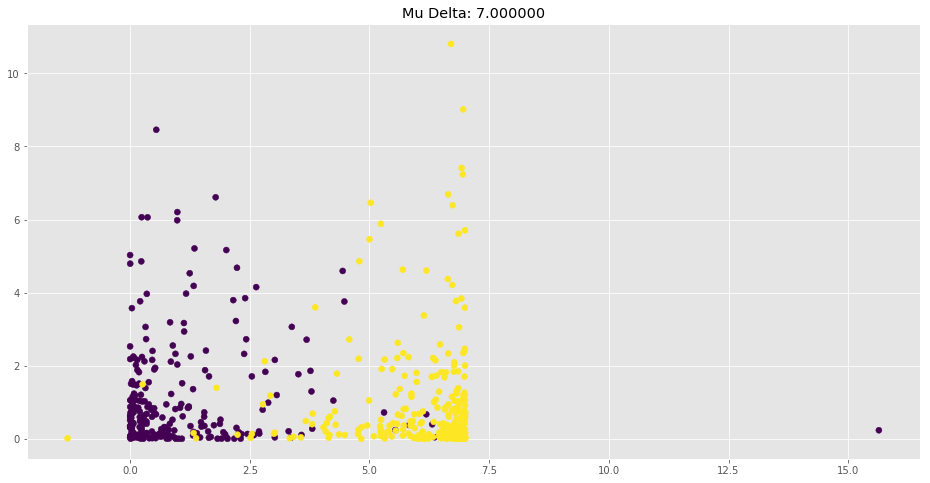

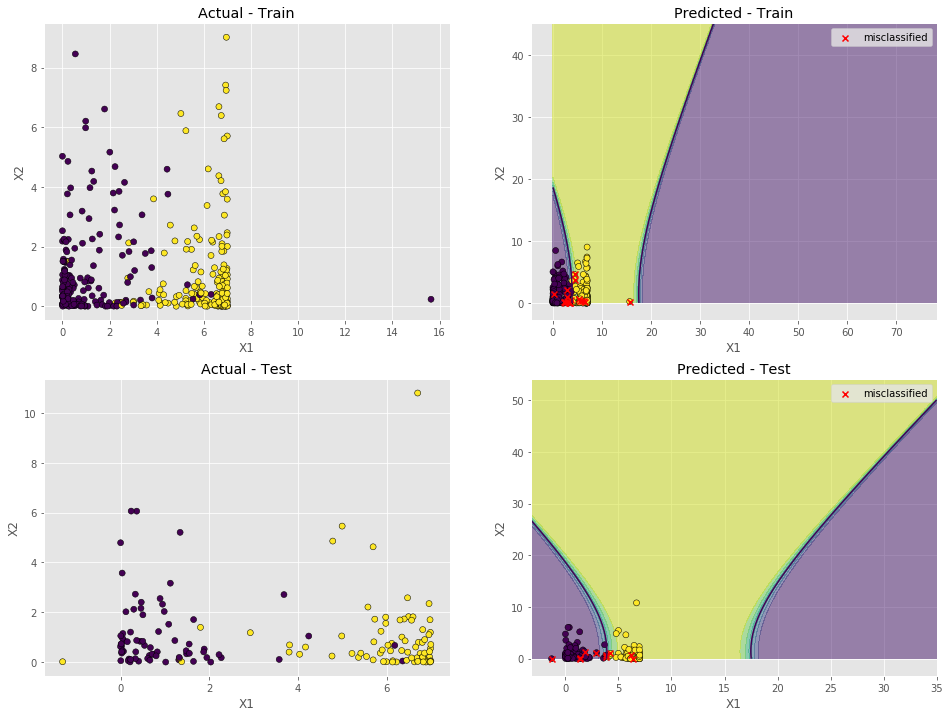

In [27]:
np.random.seed(30)
for i in range(3,8):
    ''' skewed classes'''
    skew_L0 = np.random.noncentral_chisquare(df=1, nonc=.01, size = (250,2))

    skew_R0 = np.random.noncentral_chisquare(df = 1, nonc = .01, size = (250,2))
    skew_R00 = (skew_R0[:,0]*-1) + i
    skew_R0 = np.matrix([skew_R00,skew_R0[:,1]]).T

    df_skew_L0 = pd.DataFrame(skew_L0)
    df_skew_L0['k'] = 0

    df_skew_R0 = pd.DataFrame(skew_R0)
    df_skew_R0['k'] = 1

    skew_mat = np.vstack((np.array(df_skew_L0),np.array(df_skew_R0)))
    df_skew = pd.DataFrame(skew_mat)

    X = skew_mat[:,:2]
    y = skew_mat[:,2]

    fig = plt.figure(figsize=(16,8))
    ax = plt.subplot(111)
    plt.title('Mu Delta: %f'%i)
    plt.scatter(x=X[:,0],y=X[:,1],c=y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state= 40)

    '''print X_train.shape
    print Y_train.shape'''

    clf = GaussianNB()
    clf.fit(X_train,np.array(Y_train))

    print('\nDelta Mu: %f'%i)
    print('Naive Bayes Test Accuracy: %s'%clf.score(X_test, Y_test))
    print('Naive Bayes Score: %s'%clf.score(X_test,Y_test))
    print('Naive Params: %s'%clf.get_params(deep=True))

    X_wrongTrain = find_wrong_pred(X_train,Y_train)
    X_wrongTest = find_wrong_pred(X_test,Y_test)

    xx,yy,z = class_contour(X_train,'naive')
    fig = plt.figure(figsize=(16,12))
    ax = plt.subplot(221)
    plt.scatter(x=X_train[:,0],y=X_train[:,1],c=Y_train, label='Actual',edgecolors='black')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Actual - Train')
    plt.subplot(222)
    plt.contourf(xx,yy,z,alpha=0.5)
    plt.scatter(x=X_train[:,0],y=X_train[:,1], c=clf.predict(X_train),edgecolors='black')
    plt.scatter(x=X_wrongTrain[:,0],y=X_wrongTrain[:,1],c='red', marker='x',label='misclassified')
    plt.contour(xx,yy,z,[.5])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Predicted - Train')
    plt.legend()

    xx,yy,z = class_contour(X_test,'naive')
    ax = plt.subplot(223)
    plt.scatter(x=X_test[:,0],y=X_test[:,1],c=Y_test, label='Actual',edgecolors='black')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Actual - Test')
    plt.subplot(224)
    plt.contourf(xx,yy,z,alpha=0.5)
    plt.scatter(x=X_test[:,0],y=X_test[:,1], c=clf.predict(X_test),edgecolors='black')
    plt.scatter(x=X_wrongTest[:,0],y=X_wrongTest[:,1],c='red', marker= 'x', label='misclassified')
    plt.contour(xx,yy,z,[.5],)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Predicted - Test')
    plt.legend()

- compare w/ (LDA/QDA) and logisitc
- kernel trick

Text(0.5, 1.0, 'Predicted - Test')

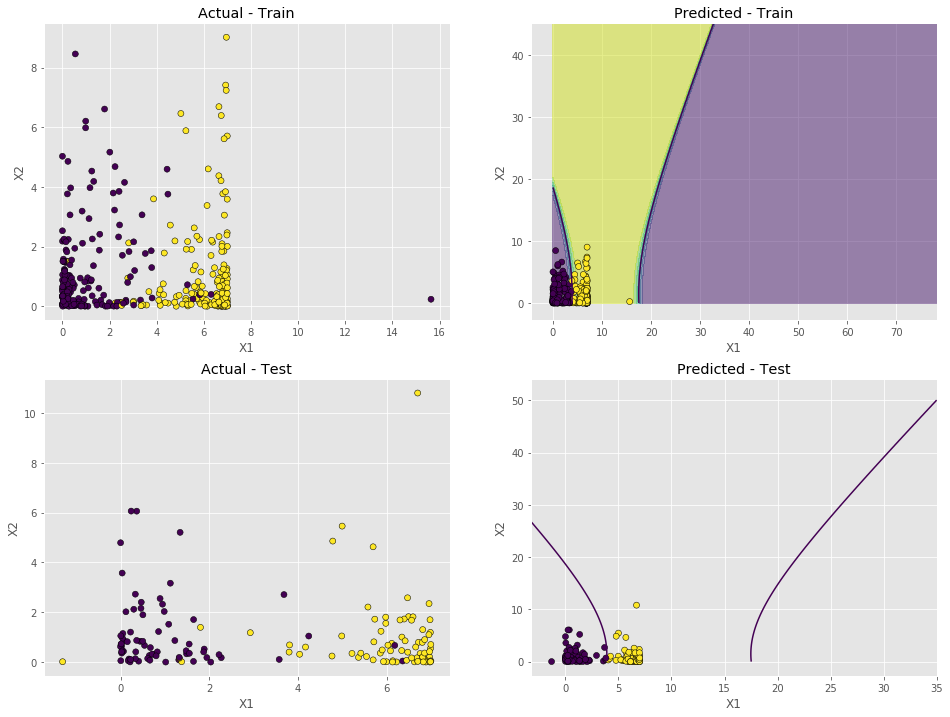

In [29]:
xx,yy,z = class_contour(X_train,'naive')
fig = plt.figure(figsize=(16,12))
ax = plt.subplot(221)
plt.scatter(x=X_train[:,0],y=X_train[:,1],c=Y_train, label='Actual',edgecolors='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Actual - Train')
plt.subplot(222)
plt.contour(xx,yy,z,[.5])
plt.contourf(xx,yy,z,alpha=0.5)
plt.scatter(x=X_train[:,0],y=X_train[:,1], c=clf.predict(X_train),edgecolors='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Predicted - Train')

xx,yy,z = class_contour(X_test,'naive')
ax = plt.subplot(223)
plt.scatter(x=X_test[:,0],y=X_test[:,1],c=Y_test, label='Actual',edgecolors='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Actual - Test')
plt.subplot(224)
plt.scatter(x=X_test[:,0],y=X_test[:,1], c=clf.predict(X_test),edgecolors='black')
plt.contour(xx,yy,z,[.5],)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Predicted - Test')


In [ ]:
def find_wrong_pred(X_test, Y_test):
    '''function that returns the X matrix of mis-classified observations'''    
    Y_comp = np.matrix([Y_test,clf.predict(X_test)]).T
    wrong_array = []
    for entry in range(len(Y_test)):
        obs = np.ravel(Y_comp[entry])
        #print obs[0],obs[1]
        if obs[0] != obs[1]:
            print 'Wrong!: %i'%entry
            wrong_array.append(entry)
        else:
            continue

In [ ]:
fig = plt.figure(figsize=(16,8))
sns.kdeplot(X_test[:,0],X_test[:,1])
fig = plt.figure(figsize=(16,8))
sns.jointplot(X_test[:,0],X_test[:,1],kind='kde')
plt.title('test')